In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Datasets:
d1.csv, d2.csv, d3.csv, d4.csv

# Final plots

In [5]:
cols = [ '#bfe9ab', # green
          '#d5702e', # orange
          '#4CAF50', # blue
          'grey' # grey
         ]
stages = ["Applicability Stage", "Decidability Stage", "Reliability Stage"]
cmap = colors.ListedColormap([cols[0], 'lightgrey'])

In [6]:
def get_reject_plot(which):
    f, axs = plt.subplots(2,3,figsize=(12, 6))

    data_orig = np.loadtxt(which + ".csv", delimiter=",")
    d_orig = data_orig[:, 0:2]
    labels_orig = data_orig[:, 2]
    mmap_orig = lambda l : 'P' if l==0 else 'D'

    clf = SVC(kernel='rbf', C=10000)
    clf.fit(d_orig, labels_orig)

    for cl in range(2):
        for st in range(3):

            data = np.loadtxt(which + ".csv_" + str(cl) + ".csv", delimiter=",", skiprows=1)
            data = data[:, 1:]
            c = data[:,3+st].reshape(121, 121).transpose()

            axs[cl,st].pcolormesh(np.arange(-0.1, 1.1, 0.01), np.arange(-0.1, 1.1, 0.01), c, cmap=cmap)
            plot_decision_regions(X=d_orig, y=labels_orig.astype(int), clf=clf, legend=0, ax=axs[cl,st],
                                  contourf_kwargs={'alpha':0},
                                  scatter_kwargs={'alpha':0})
            axs[cl,st].scatter(d_orig[labels_orig==0,0], d_orig[labels_orig==0,1], 
                               c=cols[2] if cl==0 else cols[3], marker='D',
                               alpha=1 if cl==0 else 0.5)
            axs[cl,st].scatter(d_orig[labels_orig==1,0], d_orig[labels_orig==1,1], 
                               c=cols[3] if cl==0 else cols[2], marker='P', 
                               alpha=1 if cl==1 else 0.5)
            axs[cl,st].set_xlim([-0.1,1.1])
            axs[cl,st].set_ylim([-0.1,1.1])
            axs[cl,st].set_xticks([])
            axs[cl,st].set_yticks([])
            axs[0,st].set_title(stages[st])
        axs[cl,0].set_ylabel("Input label: " + str(cl+1))

    legend_elements = [Line2D([0], [0], marker='D', label='Class 1', markersize=8, color='w', markerfacecolor='black'),
                       Line2D([0], [0], marker='P', label='Class 2', markersize=12, color='w', markerfacecolor='black'),
                       Patch(facecolor=cols[0], label='accepted'),
                       Patch(facecolor='lightgrey', label='rejected')]
    axs[1,1].legend(handles=legend_elements, ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.1))
    plt.savefig('rejectplot_'+which+'.pdf', format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()

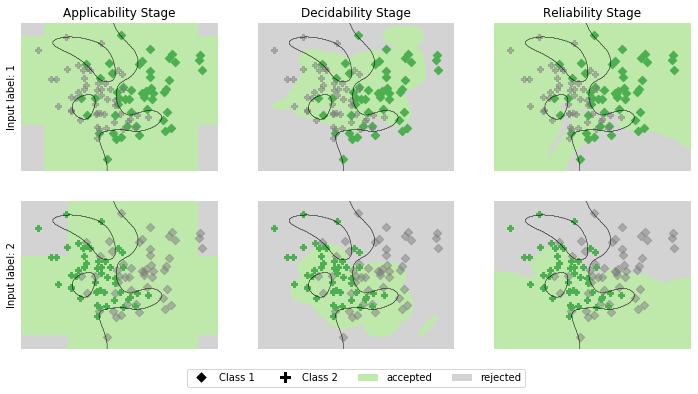

In [7]:
get_reject_plot('d1')

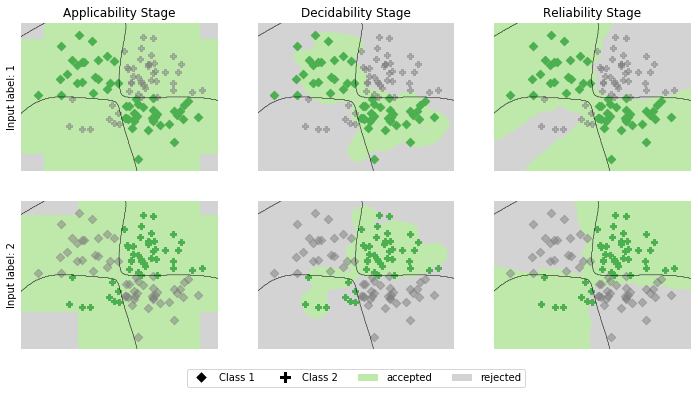

In [8]:
get_reject_plot('d2')

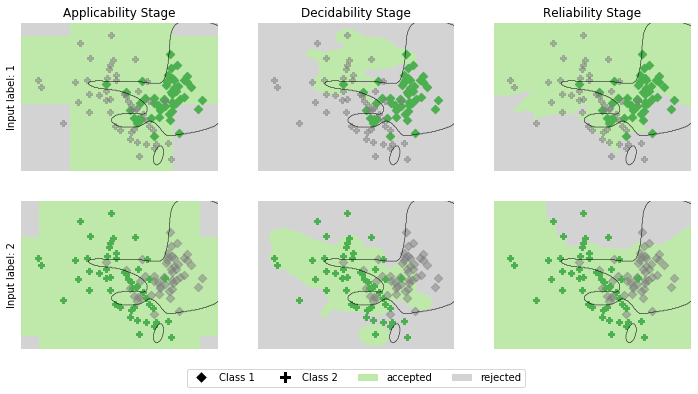

In [9]:
get_reject_plot('d3')

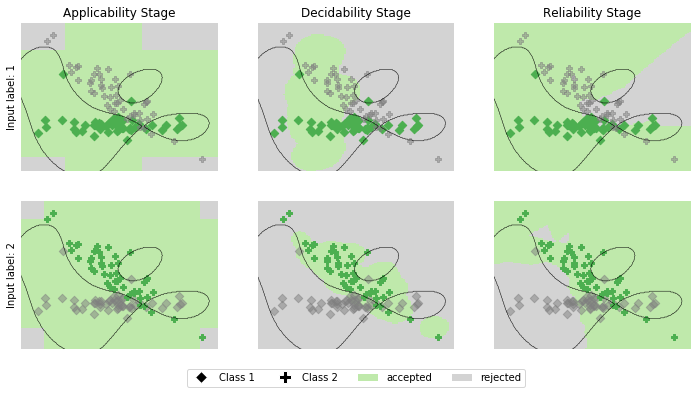

In [10]:
get_reject_plot('d4')